In [241]:
from matplotlib import pyplot as plt
from PIL import Image as im
from PIL import ImageFilter
import numpy as np
import math

In [ ]:
def convolution(img, filt_size):
    shape = img.shape
    if len(shape)==2:
        newimg = np.zeros((shape[0]-(filt_size - 1), shape[1] - (filt_size - 1)))
        filt = edge_filt2 #np.random.randint(-3, 4, (filt_size, filt_size))

        for i in range(shape[0]-filt_size+1):
            for j in range(shape[1]-filt_size+1):
                temp = img[i:i+filt_size,j:j+filt_size]
                newimg[i,j] = np.sum(np.multiply(temp, filt))
    else:
        newimg = np.zeros((shape[0]-(filt_size - 1), shape[1] - (filt_size - 1), shape[2]))
        filt = edge_filt2 #np.random.randint(-3, 4, (filt_size, filt_size))

        for i in range(shape[0]-filt_size+1):
            for j in range(shape[1]-filt_size+1):
                for k in range(shape[2]):
                    temp = img[i:i+filt_size,j:j+filt_size,k]
                    newimg[i,j,k] = np.sum(np.multiply(temp, filt))
    
    newimg[newimg<0] = 0
    newimg[newimg>255] = 255
    
    return newimg

In [ ]:
def relu(img):
    shape = img.shape
    if len(shape)==2:
        for i in range(shape[0]):
            for j in range(shape[1]):
                img[i, j] = np.max([0, img[i, j]])
    else:
        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(shape[2]):
                    img[i, j, k] = np.max([0, img[i, j, k]])
    
    return img

In [ ]:
def maxPooling(img, pool_size):
    shape = img.shape
    if len(shape)==2:
        newimg = np.full((math.ceil(shape[0]/pool_size), math.ceil(shape[1]/pool_size)))

        for i,m in zip(range(0, shape[0], pool_size), range(round(shape[0]/pool_size))):
            for j,n in zip(range(0, shape[1], pool_size), range(round(shape[1]/pool_size))):
                newimg[m, n] = np.max(img[i:i+pool_size, j:j+pool_size])
    else:
        newimg = np.zeros((math.ceil(shape[0]/pool_size), math.ceil(shape[1]/pool_size), shape[2]))

        for i,m in zip(range(0, shape[0], pool_size), range(round(shape[0]/pool_size))):
            for j,n in zip(range(0, shape[1], pool_size), range(round(shape[1]/pool_size))):
                for k in range(shape[2]):
                    newimg[m, n, k] = np.max(img[i:i+pool_size, j:j+pool_size, k])
    
    return newimg

In [ ]:
image = im.open('resim.jpg')
image

In [ ]:
img = np.array(image)

In [ ]:
conv = convolution(img, filt_size=3)

In [ ]:
rel = relu(conv)

In [ ]:
pool = maxPooling(rel, 2)

In [ ]:
plt.imshow(conv)

In [ ]:
plt.imshow(rel)

In [ ]:
plt.imshow(img)

In [ ]:
print(np.max(conv))
print(np.min(conv))

In [ ]:
print(np.max(rel))
print(np.min(rel))

In [ ]:
print(np.max(pool))
print(np.min(pool))

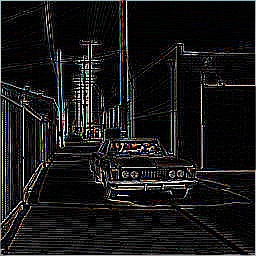

In [347]:
img = im.open('resim.jpg')
k = ImageFilter.Kernel(
    size=(3,3),
    kernel=tuple(edge_filt3.flatten()),
    scale=np.sum(km),  # default
    offset=0  # default
    )
filteredImg = img.filter(k)
filteredImg

In [348]:
rel = np.array(filteredImg)

In [349]:
pool = rel[::2,::2]

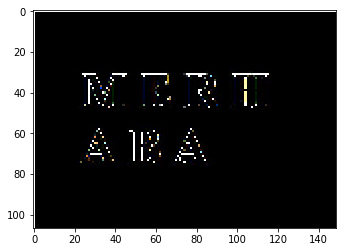

In [283]:
plt.imshow(pool[::2,::2])